# **Analyzing Amazon Toy Products Data**

---
#### Nicholas Belev
#### Chatbots and Recommendation Engines
#### 2 February 2025

Note: for data visualizations, a copy image of the result of the terminal output is included in case the terminal output does not appear on the viewer's end, or in case the user is unable to run a section of code.

---

## **Dataset Information**

Dataset URL: https://www.kaggle.com/datasets/PromptCloudHQ/toy-products-on-amazon

### **Introduction**
The provider of data used in this project provider states that their dataset is gleaned from a greater set of Amazon e-commerce information, to be specifically geared towards to toys.

The aim of this project is to explore its properties and metadata statistics, along with visualizing its trends to gain a stronger understanding of what data contributes to an effective Recommendation Engine.

---

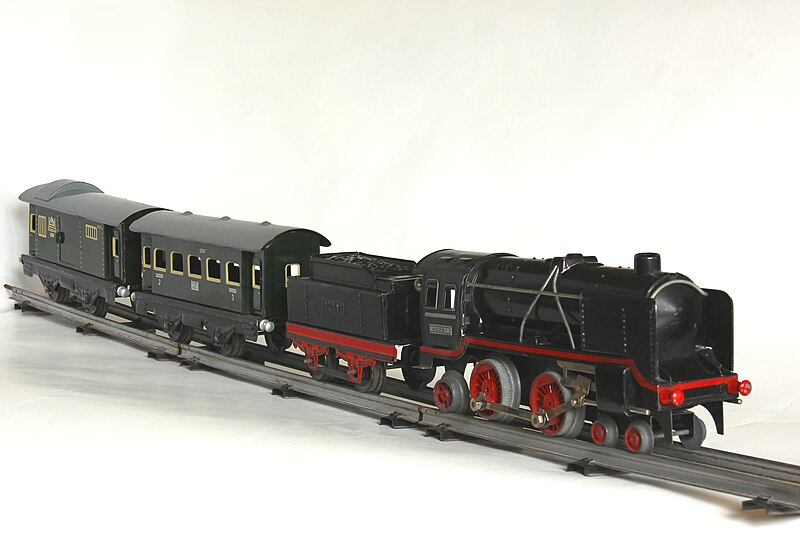

In [1]:
# Step 1: Upload your Kaggle API token
def setup_kaggle():
    from google.colab import files
    uploaded = files.upload()  # Upload kaggle.json here
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json

# Run the Kaggle setup function
setup_kaggle()

# Step 2: Download the dataset
import kaggle
kaggle.api.authenticate()


Saving kaggle.json to kaggle.json



### **Data Types**
The dataset is in CSV format by default, treating all data entries as text (even if a more appropriate data type exists).

It includes the following fields (as defined by the data provider):

- **uniq_id**: A product identifier code uniquely associating that item with a key.
- **product_name**: The name of the product.
- **manufacturer**: The item manufacturer, as Amazon records it; not identical to the assembly line outsourcer.
- **price**: The price of the product.
- **number_available_in_stock**: Quantity of the product remaining in inventory.
- **number_of_reviews**: The total number of reviews the product has received.
- **number_of_answered_questions**: A count of how many questions asked by users were answered (leveraging Amazon's Q&A service).
- **average_review_rating**: The average rating of the product based on customer reviews.
- **amazon_category_and_sub_category**: A tree-based, `>>`-delimited categorization of the product.
- **customers_who_bought_this_item_also_bought**: A list of other items purchased by customers who bought the product. This component is part of Amazon's recommendation engine.
- **description**: The product's general description.
- **product_information**: Detailed information about the product.
- **product_description**: A more comprehensive description of the product.
- **items_customers_buy_after_viewing_this_item**: Products frequently purchased by customers after viewing the product.
- **customer_questions_and_answers**: A JSON string containing all the product's Q&A pairs.
- **customer_reviews**: A JSON string containing all the product's reviews.
- **sellers**: A JSON string containing all the product's seller information. Many products on Amazon are sold by third parties.

---

### **Purpose**
This information was compiled to address:
- What types of toys are most trending on Amazon (at the time of collection)
- How significant is a reputable toy brand, in correlation to its popularity?
- Are customer reviews usable to perform human sentiment analysis on the net opinion of a toy product?

---

In [2]:
# Kaggle's identifier, as per the URL path to the data:
dataset_path = 'PromptCloudHQ/toy-products-on-amazon'
kaggle.api.dataset_download_files(dataset_path, path='toy-dataset', unzip=True)

# Check to ensure that we got the CSV we're looking for
!ls toy-dataset

Dataset URL: https://www.kaggle.com/datasets/PromptCloudHQ/toy-products-on-amazon
amazon_co-ecommerce_sample.csv


In [3]:

import pandas as pd

file_name = 'amazon_co-ecommerce_sample.csv' # filename determined from the prior LS command
toy_data = pd.read_csv(f'toy-dataset/{file_name}')

# Testing that the correct dataset was fetched and converted into a Pandas dataframe
toy_data.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


## Brief Observation of the Data
---

As an example, looking at the **item in row 2**, it clearly aligns with the expected data format.
- It contains a **unique ID code** (likely some hash to easily verify that this is the correct item).
- To us, the reader of the dataset, it is clear that this is a **toy train set**, selling for **9.99 Pound-Sterling**, from the company **CCF**.
- We can see that there are **2 new trains** in stock.
- The item has **17 reviews**, is rated **3.9 stars out of 5** (a favorable proportion), and so on...

---

In [4]:
# Function to calculate and display basic statistics for the dataset
def basic_stats(toy_data):
    # Number of data entries in the set
    n_rows = toy_data.shape[0]

    # Total number of distinct products
    n_unique_products = toy_data['uniq_id'].nunique()

    # Different manufacturers
    n_unique_manufacturers = toy_data['manufacturer'].nunique()

    manufacturer_counts = toy_data['manufacturer'].value_counts()
    most_freq_manufacturer = manufacturer_counts.idxmax()  # Who produces the most toys on the dataset?
    most_freq_manufacturer_count = manufacturer_counts.max()  # The number of toys they produce

    # Compute the mean of the toy ratings
    avg_rating = toy_data['average_review_rating'].apply(parse_rating).mean()

    # Total number of reviews and answered questions (convert text to numeric)
    total_reviews = pd.to_numeric(toy_data['number_of_reviews'], errors="coerce").sum()
    total_answered_questions = pd.to_numeric(toy_data['number_of_answered_questions'], errors="coerce").sum()

    # Format the results
    print(f"{n_rows} rows in the dataset.")
    print(f"{n_unique_products} distinct toy products.")
    print(f"{n_unique_manufacturers} toy producers.")
    print(f"{most_freq_manufacturer} producers the majority of distinct toys listed, with {most_freq_manufacturer_count} toys.")
    print(f"Average review rating for a toy is {avg_rating:.2f} stars.")
    print(f"There are a total of {int(total_reviews)} reviews and {int(total_answered_questions)} answered questions.")

    return {  # Return the statistics for future use
        'n_rows': n_rows,
        'n_unique_products': n_unique_products,
        'n_unique_manufacturers': n_unique_manufacturers,
        'avg_rating': avg_rating,
        'total_reviews': total_reviews,
        'total_answered_questions': total_answered_questions
    }

# Handle the unideal format of the product stars ratings
def parse_rating(rating_str):
    try:
        # ratings are in the form "X out of Y stars", so we extract X and Y
        x, y = map(float, rating_str.rstrip("stars").split(" out of ")) # Convert ratio to a float
        return (x / y) * 5  # Normalize to a 5-star scale for consistency
    except:
        return None  # Large dataset, throw out occasional anomalies


In [5]:
stats = basic_stats(toy_data) # Call on current dataset

10000 rows in the dataset.
10000 distinct toy products.
2651 toy producers.
LEGO producers the majority of distinct toys listed, with 171 toys.
Average review rating for a toy is 4.71 stars.
There are a total of 88796 reviews and 16946 answered questions.


### **Interpreting the Statistics**

The output of the above program is:

- **10,000 rows in the dataset.**
- **10,000 distinct toy products.**
- **2,651 toy producers.**
- **LEGO produces the majority of distinct toys listed, with 171 toys.**
- **Average review rating for a toy is 4.71 stars.**
- **There are a total of 88,796 reviews and 16,946 answered questions.**

This indicates that there are no duplicate toys; each row of data is indeed a unique product that does not reappear in the Amazon toys dataset.

Moreover, though there are 10,000 different toys listed, there are only 2,651 distinct toy manufacturing companies corresponding to all these toys. It follows that each producer is on average responsible for **10,000 ÷ 2,651**, or approximately **3.77 different toys**.

Of course, the above statement ought to be reconsidered, especially since the next statistic reveals that the biggest manufacturer of this dataset, LEGO, makes an astounding **171 different toys**. Hence, it is worth examining the distribution of how many manufacturers produce how many different toys. This finding gives evidence of a dataset skewed toward a select few companies providing the majority of the toys listed.

Next, an average toy has a **4.71 rating**, which is favorable and quite high. This indicates that most toys deliver or exceed expectations, although the deviation ought to be considered in the case of disliked toys that are outliers in the dataset.

Lastly, there are numerous reviews, totaling **88,796** for the 10,000 toys listed. Similarly, **16,946 questions asked by potential buyers** have been answered by either the company or other shoppers. This is noteworthy shopper engagement and yields an average of **8.88 reviews per item**, with **1.69 answered questions per item**. Again, these averages ought to be considered with context for the variance of reviews per item (some items may have many reviews, while many others might have few or none).

---

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

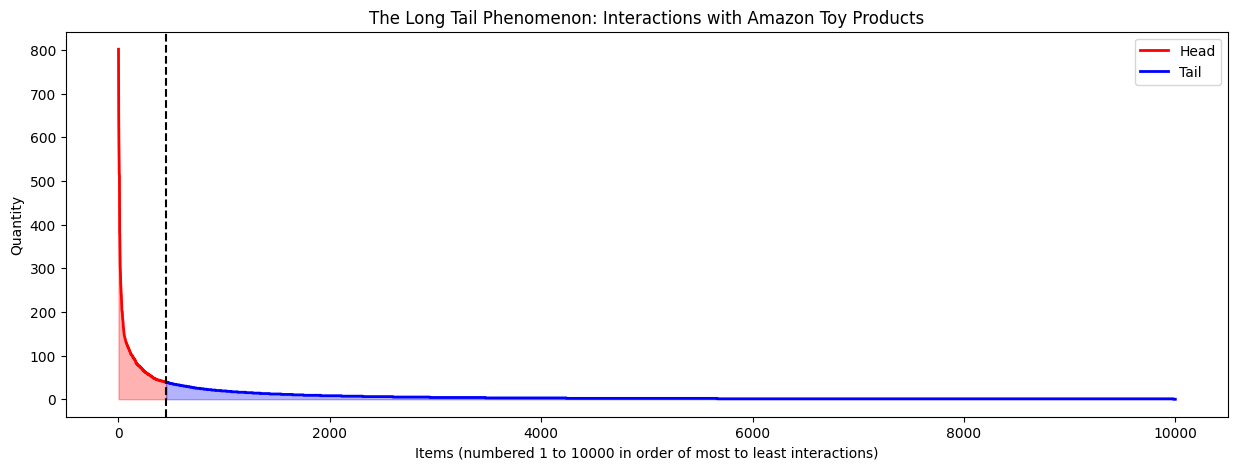

In [7]:
# Replicating the functionality of the long tail plot from the library seen in class, due to complications with version compatibility
def long_tail_plot(df, item_column, interaction_column, head_threshold=0.5):
    """
    Long-tail plot, depicting the Pareto distribution of a dataset
    Divides the data into head and tail subdivision, color-coded regions,

    Params:
        df (pd.DataFrame): The dataset containing interactions.
        item_column (str): The column containing the item key ('uniq_id').
        interaction_column (str): The column representing interactions to be used in the distributiom ('number_of_reviews').
        head_threshold (float): Proportion of total interactions contained in the "head" area; implicitly defines what is considered to be the tail.
    """
    temp_interactions = pd.to_numeric(df[interaction_column], errors="coerce").fillna(0) # To numeric, exclude invalid entries
    interaction_counts = temp_interactions.groupby(df[item_column]).sum().sort_values(ascending=False) # Sort by high to low frequency of interactions

    # Calculate percentage of interactions
    interaction_counts_cumsum = interaction_counts.cumsum()
    interaction_counts_cumperc = interaction_counts_cumsum / interaction_counts.sum()

    # Where the dividing line between the head and tail portion of the data falls
    total_items = len(interaction_counts)
    head_count = interaction_counts_cumperc[interaction_counts_cumperc <= head_threshold].size
    tail_start = head_count

    # Have our x and y coordinates for plotting the sorted data
    x_values = np.arange(total_items)  # Unit steps for sorted items (1 to 10000, since 10K total toys)
    y_values = interaction_counts.values  # Review / Interaction counts sorted from highest to lowest

    plt.figure(figsize=(15, 5))

    # Displaying the Head portion of the line (50% interactions)
    plt.plot(x_values[:head_count], y_values[:head_count], label="Head", color="red", linewidth=2)
    plt.fill_between(x_values[:head_count], y_values[:head_count], color="red", alpha=0.3)

    # Displaying the Tail (50% interactions)
    plt.plot(x_values[tail_start:], y_values[tail_start:], label="Tail", color="blue", linewidth=2)
    plt.fill_between(x_values[tail_start:], y_values[tail_start:], color="blue", alpha=0.3)

    # Style and sheet
    plt.axvline(tail_start, color='black', linestyle='--')
    plt.title(f"The Long Tail Phenomenon: Interactions with Amazon Toy Products")
    plt.xlabel("Items (numbered 1 to 10000 in order of most to least interactions)")
    plt.ylabel("Quantity")
    plt.legend()

    plt.show()

# Run on the toy data, using reviews
long_tail_plot(df=toy_data,
                      item_column="uniq_id",
                      interaction_column="number_of_reviews",
                      head_threshold=0.5)


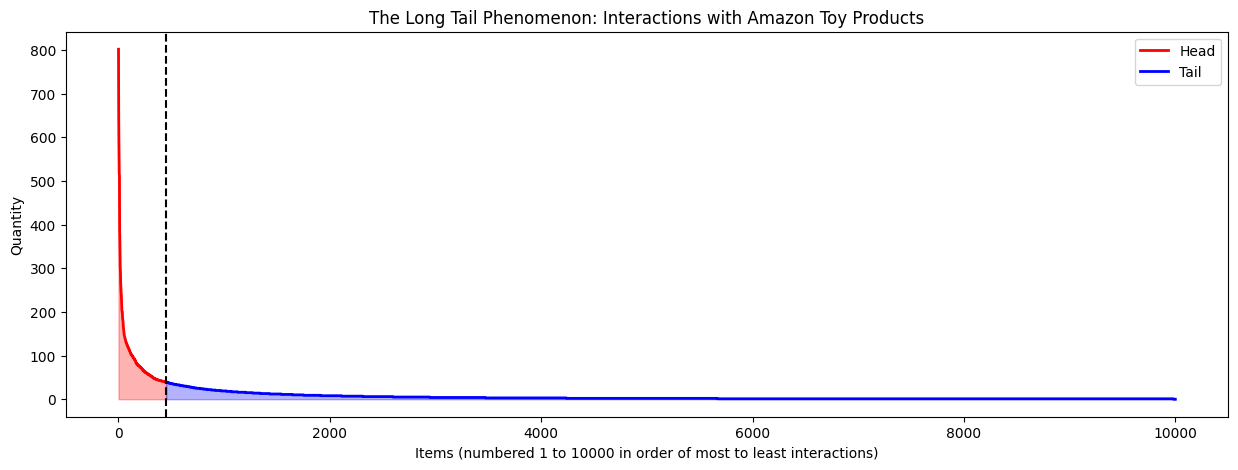

### **Interpreting the Phenomenon Regarding Reviews**

Clearly, the **long tail phenomenon** is satisfied given the presence of a Pareto distribution associated with this trend. It makes sense that certain very popular toys (for example, those of LEGO—the biggest producer of toys in this dataset) would have more demonstrated interest and engagement in the form of reviews—and probably this would correlate with more questions answered as well as other digital measures of user engagement.

Side note: Amazon likely gauges user interest in many other and more subtle manners besides explicit interaction (which reviews are).

The result of this graph depiction of the phenomenon, applied to toy reviews, serves as a proxy answer to the previously mentioned point: *"some items may have many reviews, while many others might have few or none."* This indicates the need to be mindful of accepting a mean as representative of the majority of the toy items listed in the dataset. When, in fact, it is evident—given the presence of such a strong and steep Pareto distribution—that indeed a very select few toys have up to **800 reviews**, however the bottom approx. **9500** toys have between **0 and 100 reviews** (erring towards the 0).

Ultimately, this is a normal trend for a recommendation dataset, influenced by human tendencies and behaviors.

---

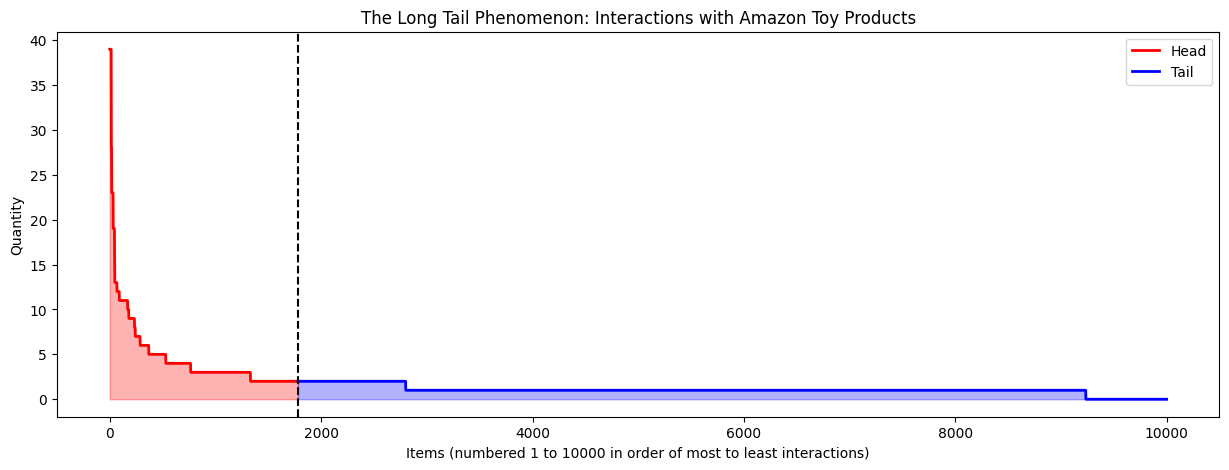

In [8]:
# Run on the toy data, using questions answered
long_tail_plot(df=toy_data,
                      item_column="uniq_id",
                      interaction_column="number_of_answered_questions",
                      head_threshold=0.5)

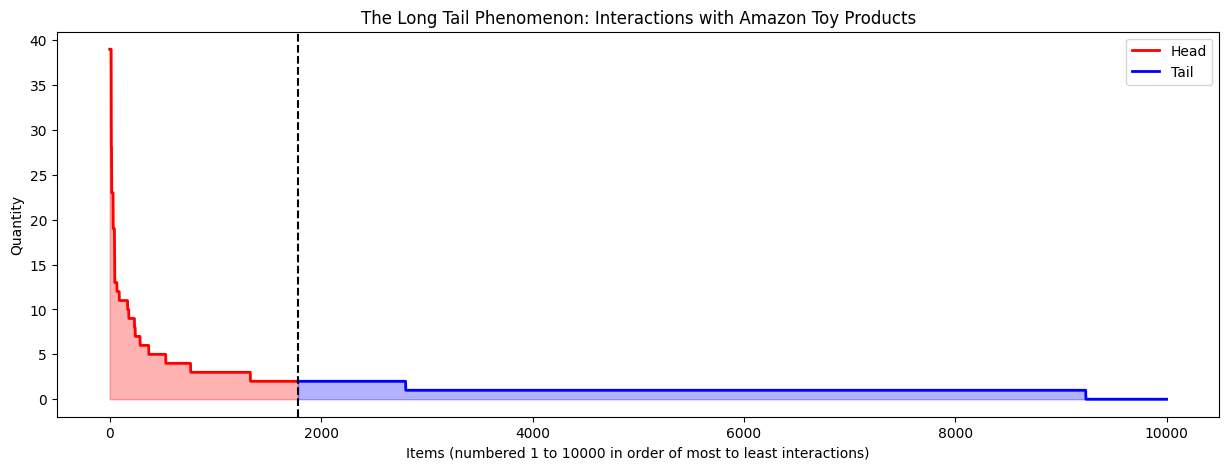

### **Interpreting the Phenomenon Regarding Answered Questions**

Again, the **long tail phenomenon** is observed via a rough (less smooth) depiction of the Pareto distribution. For similar reasons to the Reviews graph, it is sensible that a select few toys would capture more interest and invoke more questions asked from shoppers and questions answered from product owners (especially given the correlation between interest in viewing a product and buying it).

We notice that since there is significantly less questions answered per item than there are reviews per item, the ranked and ordered dataset has a visible staircase pattern, though if this were to be smoothed over, it would still converge to the asymptotically flattening trend seen in the prior example.

Similar to with reviews, the long tail phenomenon applies to the questions data as well, indicating that there is high deviation from the mean number of answered questions per item with a select few toys having just under **40 answered questions**, whereas the bottom approx. **7 thousand** toys have between **0 and 1 answered questions**.

Accordingly, this trend is reasonable and expected given the nature of datasets for recommendation engines, which this one could be.

---

In [9]:
def stars_distribution(df, rating_column):
    """
    Histogram of the average rating distribution for toys.

    Params:
        df (pd.DataFrame): The dataset containing toy ratings.
        rating_column (str): The column representing the average rating for each toy.
    """
    # The rating column will be our stars, so we use the earlier parse_rating function to handle the "X out of Y stars" format of the data
    ratings = pd.to_numeric(df[rating_column].apply(parse_rating), errors="coerce").dropna() # Redundant cleaning away bad data

    # Making the histogram
    plt.figure(figsize=(10, 6))
    # 51 bins because 0.0 (in theory; lowest in practice is 1.0) to 5.0 has 51 unique two digit possible ratings
    # We want the smoothest visualization of the distribution possible
    plt.hist(ratings, bins=51, range=(0, 5), color='blue', edgecolor='none', alpha=0.7)
    plt.title("Distribution of Average Ratings for Toys", fontsize=16)
    plt.xlabel("Average Rating (0.0 - 5.0)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

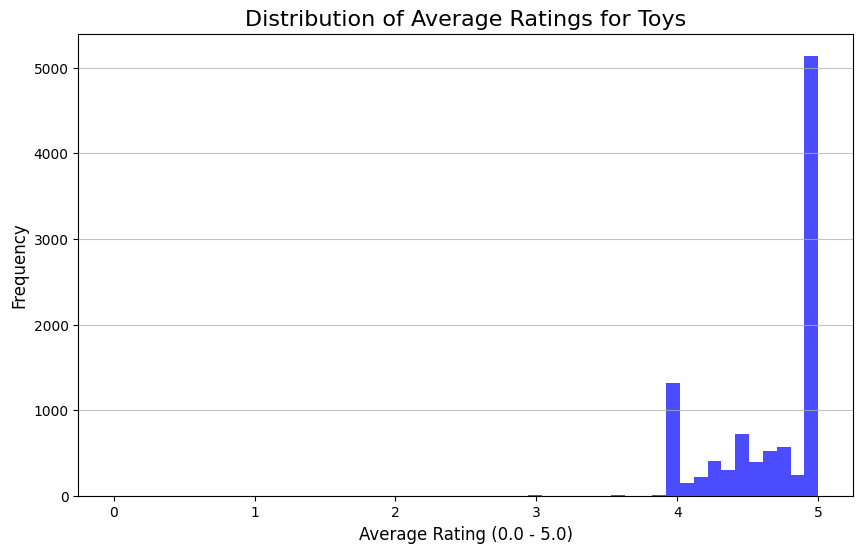

In [ ]:
stars_distribution(df=toy_data, rating_column="average_review_rating")

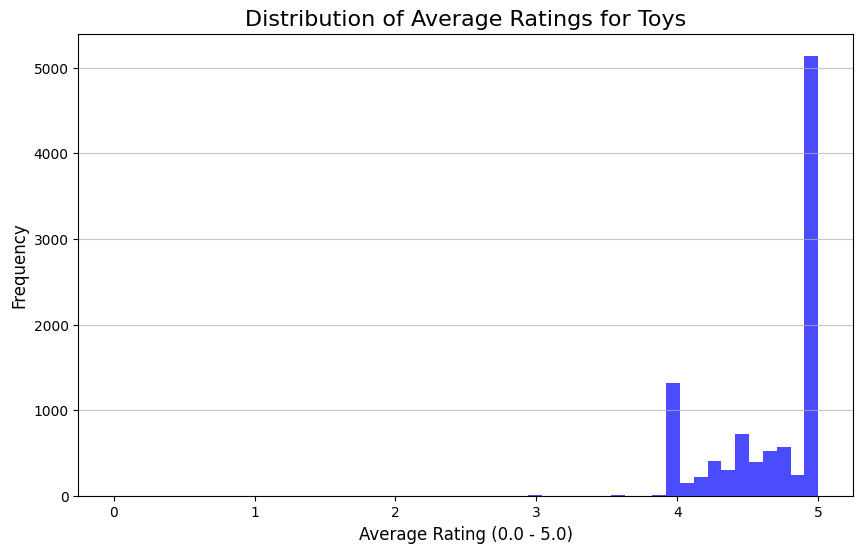

### **Assessing the Rating Distribution**

Upon plotting the average rating for every toy in this dataset, in histogram format, some semblance of a statistical trend is visible.

For instance, it is clear that the **mode** of the data is a **5.0 rating**, followed in second highest frequency by a **4.0 rating**. There are extremely few rating lower than 4.0, the lowest appearing to be approximately **3.1**. Interestingly, between 4.0 and 5.0, a **bell-shaped, roughly symmetrical distribution** emerges with a **median seemingly at the 4.5 rating region**.

To analyze the reason for this distribution and trend, a few key aspects must be considered. Firstly, the vast majority of data is within the ratings range **[4.0, 5.0]**. This could pertain to how this dataset was selected (from its Amazon database superset), perhaps with a bias towards well-liked toys. More likely, it could indicate that on the subject of children's toys, reviewers are more considerate about harshness and strong emotional ratings (unlike, say, movies geared towards an older audience). Another possibility is that companies manufacturing children's toys strive for high quality due to the high-risk nature of having a defective or unsafe toy used by small children.

Next, the **mode being 5.0** indicates that a number of the raters are just generous and happy with their products—no complaints—so a 5-star rating is their go-to. Similarly, perhaps the more critically minded raters find some small thing they don't like in most children's toys but aren't ruthless in their dislike, so penalize it one star, yielding a second most frequent rating of **4.0**.

Between these peaks lies the **normal-esque distribution** of scores between **4.1 and 4.9**. It makes sense that the random variable associated with personal levels of taste, preference, and criticism converges towards a **normal distribution**. After all, this trend arises frequently in matters related to human randomness, life, and nature—fascinating that it appears here as well.

---

In [10]:
def reviews_vs_questions(df, reviews_column, questions_column):
    """
    Scatter plot for the number of reviews (y-axis) vs. the number of answered questions (x-axis),
    and determines the trend line.

    Params:
        df (pd.DataFrame): The dataset containing toy data.
        reviews_column (str): The column representing the number of reviews for each item.
        questions_column (str): The column representing the number of answered questions for each item.
    """
    # Convert both columns to numeric, handling non-numeric data gracefully
    reviews = pd.to_numeric(df[reviews_column], errors="coerce").fillna(0)
    questions = pd.to_numeric(df[questions_column], errors="coerce").fillna(0)

    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(questions, reviews, alpha=0.6, color="red", label="Items")

    # Trend line
    z = np.polyfit(questions, reviews, 1)  # First-degree polynomial (linear trend line) y=reviews, x=questions
    p = np.poly1d(z)
    plt.plot(questions, p(questions), color="red", linewidth=2, label=f"Trend Line: y = {z[0]:.2f}x + {z[1]:.2f}")

    # Labels and title
    plt.title("Number of Reviews vs. Number of Answered Questions", fontsize=16)
    plt.xlabel("Number of Answered Questions", fontsize=12)
    plt.ylabel("Number of Reviews", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


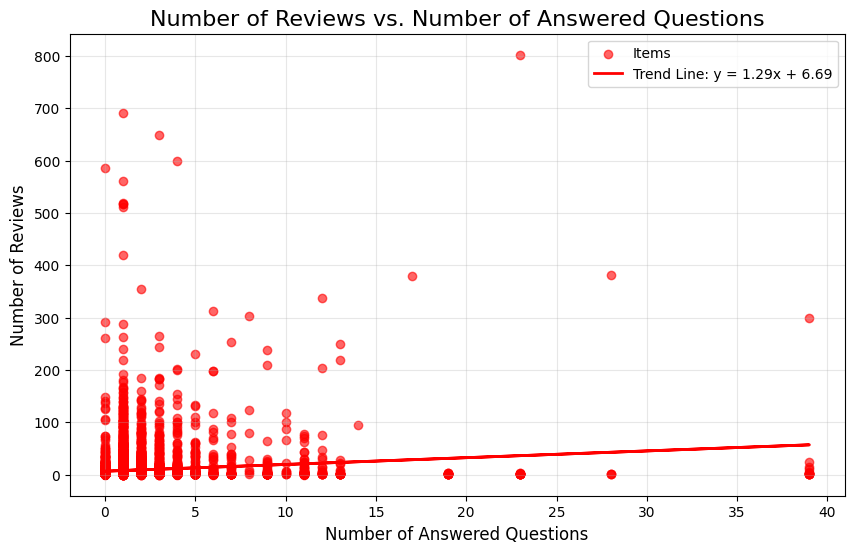

In [ ]:
reviews_vs_questions(df=toy_data,
                          reviews_column="number_of_reviews",
                          questions_column="number_of_answered_questions")


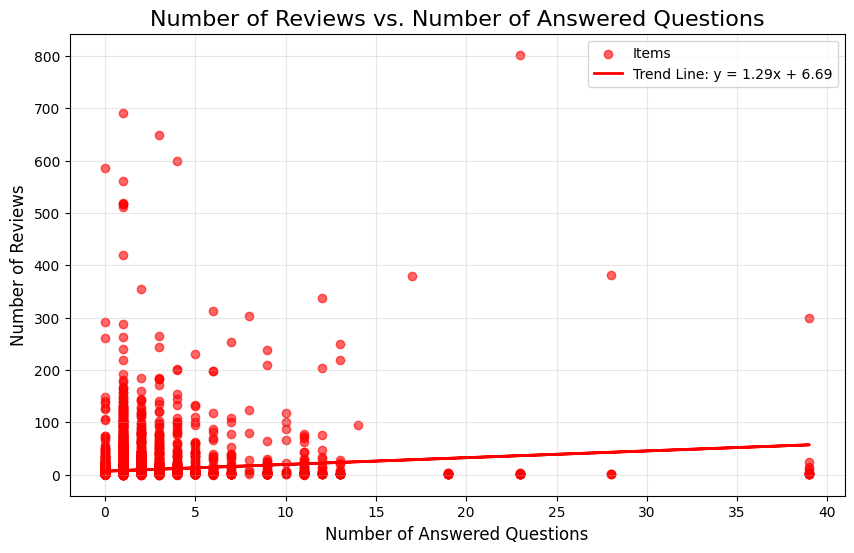

### **Assessing the Reviews as a Function of Answered Questions**

Naively, one might expect that the correlation between the quantity of reviews and the quantity of answered questions is positive. This would be reasonable considering that both contribute to a measure of user interaction and define a form of "popularity" for the corresponding toy.

Surprisingly, though, the scatterplot above reveals **visibly low correlation**, although it may average to a positive value. This means that there is a significant portion of toys on Amazon for which there are very many reviews with very few answered questions. The reverse is also true.

Studying the **bottom left corner** of the scatterplot shows a concentration of data for toys having both **varying but extremely few reviews and varying but extremely few answers**.

Evidently, the line of best fit is a **poor fit**, and this data does not conform neatly to a function `y = f(x)`, where `y` is the number of reviews and `x` is the number of answered questions for the toy in question.

This instance serves as a lesson to thoroughly test assumptions about data before taking them as certain and certainly before incorporating them into a project or explanation.

---

In [11]:
# To be used for some elementary natural language processing of all the toy reviews on the Amazon toys dataset
import re
from nltk.corpus import stopwords
import nltk

In [12]:
nltk.download('stopwords')

def process_reviews_simple(df, review_column):
    """
    Find the most frequent words used in customer reviews

    Params:
        df (pd.DataFrame): The dataset containing customer reviews.
        review_column (str): The column with concatenated customer reviews per item.

    Returns:
        dict: key: words, value: their corresponding frequencies
    """
    # Want English stopwords / filler words to exclude from our Bag of Words
    stop_words = set(stopwords.words('english'))

    # Merge all reviews into giant string
    all_reviews = " ".join([
        review.split("//")[0].strip()  # Format of review for a toy item is review // stars // date // ... // ...
        # we're only interested in [review] so extract everything before the first occurrence of '//'
        for review in df[review_column].dropna() # clean nulls
    ])

    all_reviews = re.sub(r'[^\w\s]', '', all_reviews.lower())  # Remove punctuation, to lowercase using regex

    # Split by spaces into word "tokens"
    words = all_reviews.split()

    # Count word frequencies, ignoring stopwords
    # This is effectively a means to obtain a Bag of Words for Amazon reviews of all these toys
    word_frequencies = {}
    for word in words:
        if word not in stop_words:
            word_frequencies[word] = word_frequencies.get(word, 0) + 1

    return word_frequencies

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
# Apply to the 'customer_reviews' column
word_freqs = process_reviews_simple(df=toy_data, review_column="customer_reviews")

print("Top 20 Most Frequent Words in Customer Reviews:")
for word, freq in sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f"{word}: {freq}")
# Sort with the key as the frequency of the word, tuple[1], then reverse so largest values come first, take entries 0 to 19
# These are the 20 most frequent words used in review language


Top 20 Most Frequent Words in Customer Reviews:
stars: 2363
five: 1997
great: 1069
good: 823
fun: 357
four: 332
quality: 308
excellent: 304
model: 229
product: 218
toy: 217
nice: 203
value: 200
love: 191
little: 189
brilliant: 172
perfect: 171
lovely: 150
set: 142
happy: 140


### Understanding the Most Frequent Words in Customer Reviews

The output of the above program is:

---
```
Top 20 Most Frequent Words in Customer Reviews:
stars: 2363
five: 1997
great: 1069
good: 823
fun: 357
four: 332
quality: 308
excellent: 304
model: 229
product: 218
toy: 217
nice: 203
value: 200
love: 191
little: 189
brilliant: 172
perfect: 171
lovely: 150
set: 142
happy: 140
```

---

Referring to this word processing as semantic analysis is a stretch, obviously an individual words frequency count doesn't require the algorithm understanding the meaning of the words it encounters in context.  However, the most frequent words still provide insight into the typical shopper / reviewer's mind.

Looking at the words, a number of them are afiliated with a positive emotion or praise towards the product: love, happy, brilliant, perfect, great, good, excellent.  There are also other standout words such as four, five, stars which likely come from the tendency of reviewers to include the star rating they are assigning to the product alongside the review; the dominance of 4's and 5's in text mention also aligns with their frequency in the rating distribution.

---

## **Conclusion - Tying Into Recommendation Engines**

After performing analyses across multiple dimensions of this Amazon Toy Product dataset, there are a number of indicators that it would allow for an effective recommendation to be constructed.

On a more superficial level, this dataset checks a number of the boxes associated with a quality recommendation engine data source:

- It is **fairly large** and has **multiple parameters** to assess user preferences:
  - It categorizes items.
  - Tracks what items are purchased in association with viewing the current item.
  - Includes price information to determine customer spending habits.
  - Contains rating data to determine if an item is popular and/or well-liked (on a 5-star scale).
  - Includes the contents of customer reviews and Q&A (permissible for sentiment analysis), along with other metadata.

### **Categorization**
Categorization clearly offers a means of classification—determining what items appeal to different users based on what categories of items they are frequently buying, reviewing, hovering over, or clicking on.

### **Long Tail Phenomenon**
Moreover, this subset of Amazon data clearly follows the **long tail phenomenon**, a key indicator that a dataset is appropriate for gauging user tastes and preferences with popular and more specific items—i.e., building a recommendation engine.

### **Sentiment and Technical Recommendations**
Focusing on sentiment and more technical means of recommendation, the frequent mention of positive words such as "great," "love," and "excellent" indicates that the majority of reviews are favorable, which suggests that users are generally satisfied with the toys listed in this dataset. These insights can be leveraged by recommendation engines in several ways:

#### **Incorporating Sentiment Analysis**
While the frequency count conducted earlier isn't a full sentiment analysis, the dominance of positive words suggests that sentiment analysis could be effectively used as part of a recommender system. Reviews with overwhelmingly positive sentiment can signal highly recommended products, while less favorable sentiment can help identify items to exclude or target toward specific audiences.

#### **Priorities of the Recommender Systems**
- A recommender system based on this data could prioritize **highly-rated products** that also have a strong presence of positive reviews and a large number of reviews. These products can be defined as popular, and by the long-tail phenomenon, they are more likely to satisfy users.
- Additionally, those with a **significant proportion of answered questions** (indicating strong shopper engagement) ought to be promoted as popular.

### **Evaluating Datasets**
The current dataset is suitable for building a recommender system focused on **highly-rated and well-reviewed products**, particularly in the context of toys. However, if the goal is to recommend niche or underrepresented items, additional datasets or metadata (e.g., user behavior, preferences) would be needed.

### **Determining the Type of Recommender System**
This dataset clearly has the potential to fuel a **content-based recommendation system**, as it contains detailed features of products: category, reviews, star ratings, descriptions, clicked links, etc.

Of course, this also gives a strong argument for characterizing users/shoppers to find similar interests and trends between them. This makes it feasible to employ a **collaborative filtering system** (leveraging user-item interactions or purchase history) to further enhance recommendations by tailoring them to specific user preferences.

---